In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import joblib

In [2]:
# Example of loading data into a pandas DataFrame (replace with your actual data loading)
df = pd.read_csv('data/tmp/encoded_train.csv')
test_df = pd.read_csv('data/tmp/encoded_test.csv')

# Display the first few rows of the dataframe
df.head()


,Day,Month,Hour,Minute,Night,Holiday,Block,lat,long,Category,...,StreetType-PL,StreetType-AL,StreetType-WY,StreetType-TR,StreetType-DR,StreetType-AV,Season-Spring,Season-Summer,Season-Fall,Season-Winter
0,29,11,0,17,1,0,0,0.584478,-1.557336,OTHER OFFENSES,...,0,0,0,0,0,0,0,0,1,0
1,1,6,8,0,0,0,1,0.911468,0.775401,OTHER OFFENSES,...,0,0,0,0,0,0,0,1,0,0
2,27,4,6,29,0,0,1,-2.045603,0.570183,OTHER OFFENSES,...,0,0,0,0,0,0,1,0,0,0
3,1,4,15,49,0,0,32,1.510611,-0.150875,ASSAULT,...,0,0,0,0,0,0,1,0,0,0
4,25,7,16,19,0,0,0,0.718501,0.532851,ASSAULT,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Define features (X) and target (y)
X = df.drop('Category', axis=1)  # Features: all columns except 'Category'
y = df['Category'] 

x_test = test_df.drop('Category', axis=1) # Features: all columns except 'Category'
y_test = test_df['Category']


In [4]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(verbose=2, n_estimators=100, random_state=42, n_jobs=8)

In [5]:
# Fitting the model
rf_classifier.fit(X, y)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.0s


building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   24.1s finished


RandomForestClassifier(n_jobs=8, random_state=42, verbose=2)

In [6]:
# Predict on the test data
y_pred = rf_classifier.predict(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    6.9s finished


In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.30617846364102275


In [8]:
y_pred_proba = rf_classifier.predict_proba(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    7.0s finished


In [12]:
label_binarizer = LabelBinarizer()
labelTransformed = label_binarizer.fit_transform(y_test)

removed_cats = ['TREA', 'PORNOGRAPHY/OBSCENE MAT', 'GAMBLING', 'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'BRIBERY', 'BAD CHECKS', 'FAMILY OFFENSES', 'SUICIDE']

df = pd.DataFrame(y_pred_proba, columns=rf_classifier.classes_)

for cat in removed_cats:
                df[cat] = 0.0

df = df[label_binarizer.classes_]

loss = log_loss(labelTransformed, df)
print(f'Log Loss: {loss}')

Log Loss: 5.218739265254915


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)


            ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
ARSON           5       48           0        0        14                   0   
ASSAULT         6     3297           0        0       299                  33   
BAD CHECKS      0        4           0        0         3                   0   
BRIBERY         0       30           0        0         1                   0   
BURGLARY        2      538           0        0       755                   3   

            DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  \
ARSON                                 0              7            1   
ASSAULT                               3            629           81   
BAD CHECKS                            0              0            0   
BRIBERY                               0              2            0   
BURGLARY                              1            102            0   

            EMBEZZLEMENT  ...  SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  \
ARSON    

<Axes: xlabel='Predicted', ylabel='Actual'>

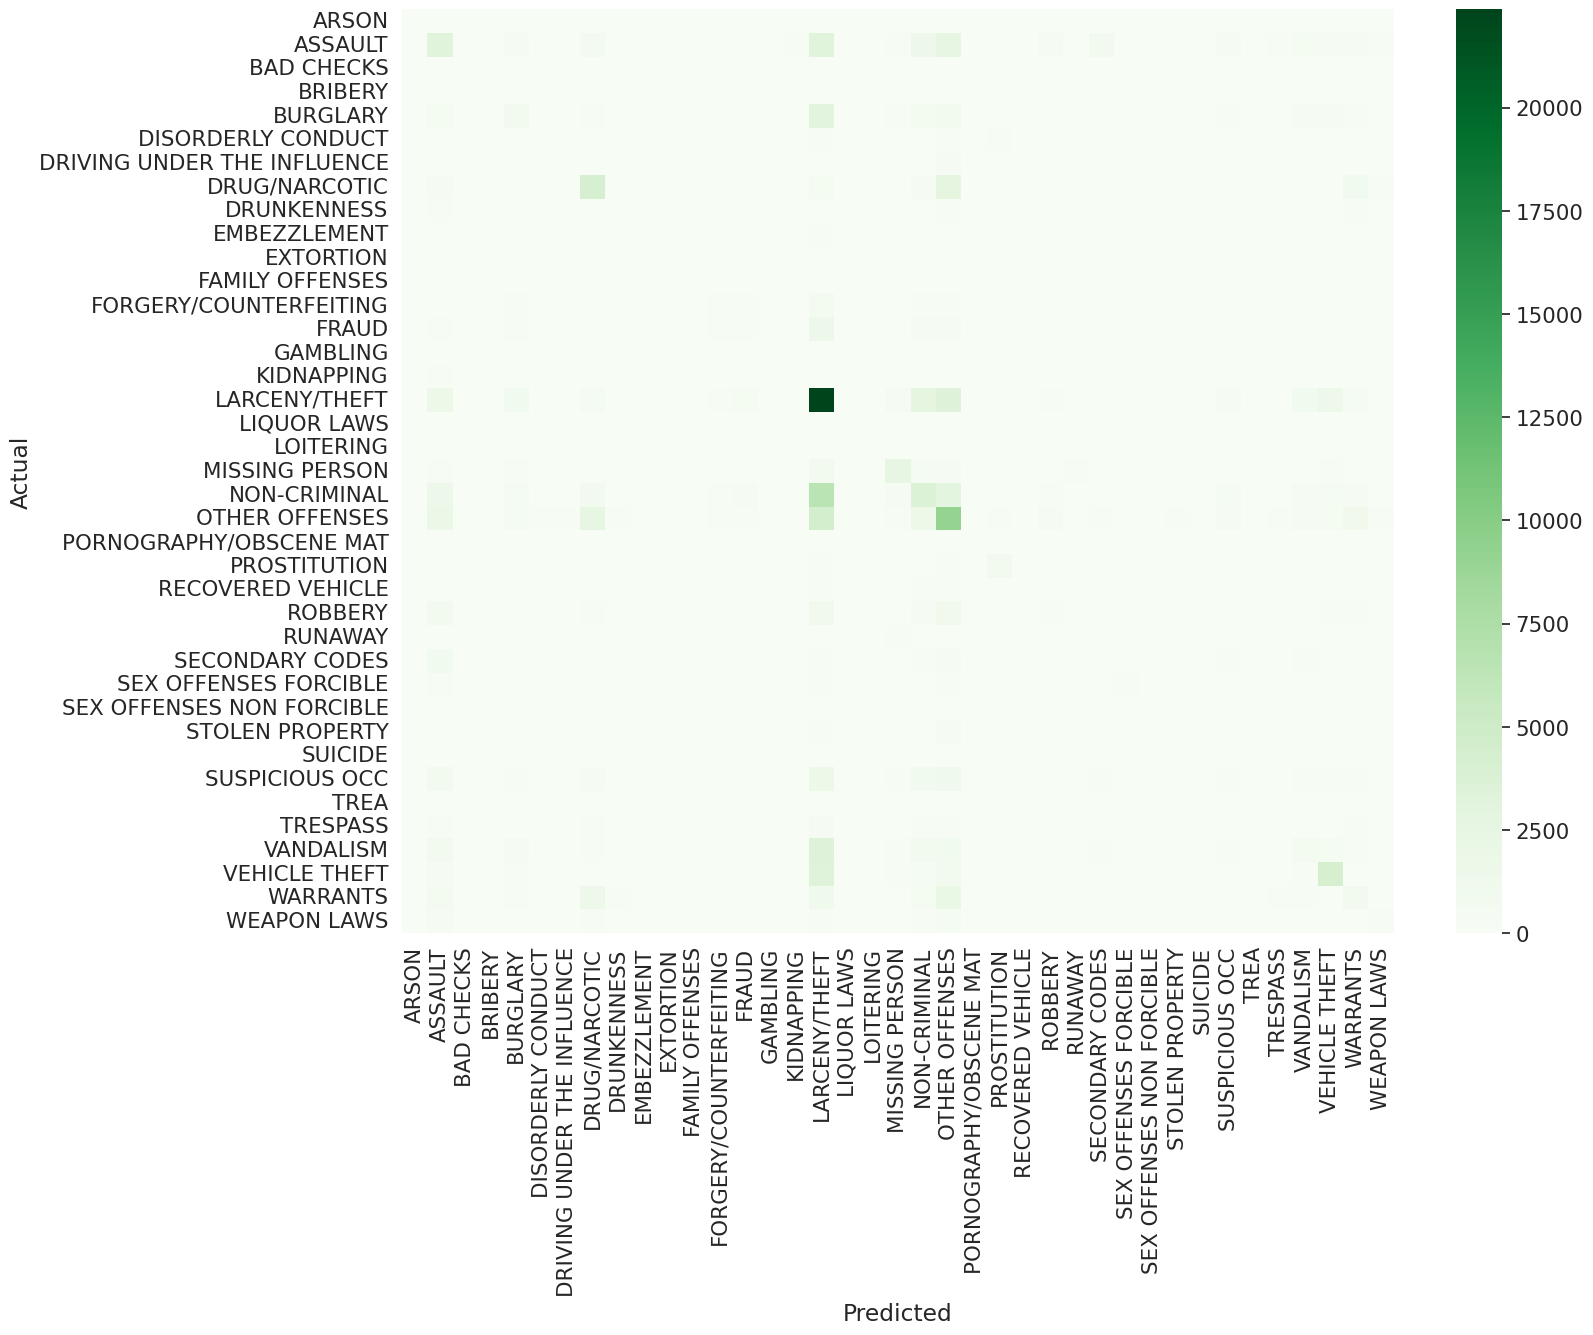

In [ ]:
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cbar=True, cmap= "Greens", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )

In [ ]:
# Save the model
joblib.dump(rf_classifier, 'models/random_forest/random_forest_model.pkl')

KeyboardInterrupt: 